In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers
pio.renderers.default = "svg"

#please change "svg" to "plotly_mimetype" to get interactive plotly graphsp



In [40]:
World_happiness= pd.read_csv("cleaned_version")

In [41]:
World_happiness.describe()
# Below table will be used as a benchmark of evaluation of any calculated values

,Year,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Positive_Affect,Negative_Affect,Confidence_In_National_Government
count,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000,2199.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501,0.483999
std,4.718736,1.125529,1.148128,0.120594,6.815805,0.139094,0.158385,0.180867,0.105342,0.086559,0.176505
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737,0.068769
25%,2010.000000,4.646750,8.505131,0.747512,59.412500,0.658615,-0.107358,0.697610,0.572742,0.208157,0.358886
50%,2014.000000,5.432437,9.491772,0.834280,64.879997,0.766945,-0.016512,0.791269,0.661645,0.261508,0.483999
75%,2018.000000,6.309460,10.366237,0.904607,68.329998,0.857775,0.086938,0.865565,0.736762,0.322382,0.588172
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590,0.993604


In [42]:
World_happiness[World_happiness.duplicated()]
# No duplicated indecies

,Country_Name,Regional_Indicator,Year,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Positive_Affect,Negative_Affect,Confidence_In_National_Government


### Grouping by "country_name" so that redandancy is removed and taking the mean

In [43]:
World_happiness_avg= World_happiness.groupby(['Country_Name', "Regional_Indicator"])[World_happiness.columns.drop(['Regional_Indicator','Country_Name'])].agg('mean').reset_index()

# Feature understanding

### A: "Perception of Corruption" and "Confidence in National governemnt"

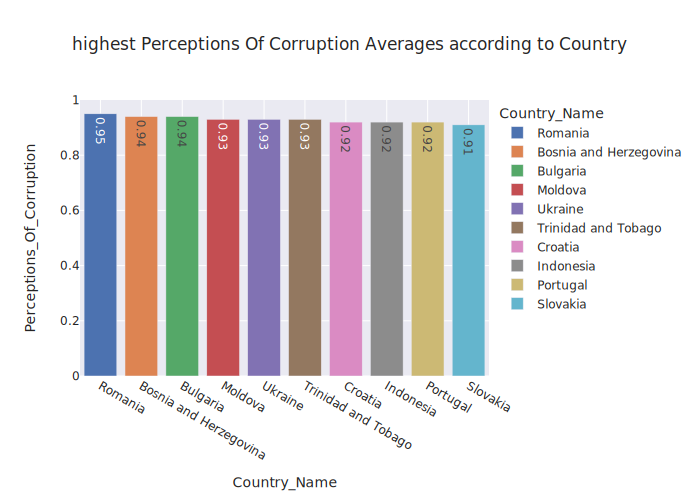

In [44]:
df_corrup= World_happiness_avg[["Country_Name", "Perceptions_Of_Corruption"]]
df_corrup= df_corrup.set_index("Country_Name").sort_values(by='Perceptions_Of_Corruption', ascending=False).round(2).head(10)
fig = px.bar(df_corrup, x = df_corrup.index, y = 'Perceptions_Of_Corruption',
            title = 'highest Perceptions Of Corruption Averages according to Country', template = 'seaborn', color= df_corrup.index ,text = 'Perceptions_Of_Corruption')
fig.show()

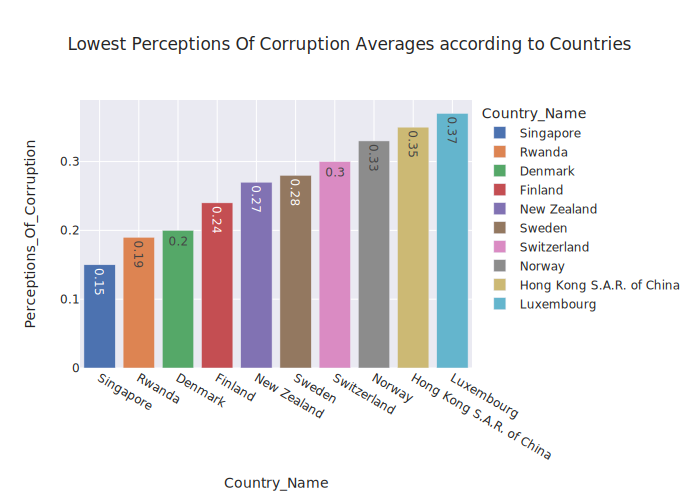

In [45]:
df_corrup= World_happiness_avg[["Country_Name", "Perceptions_Of_Corruption"]]
df_corrup= df_corrup.set_index("Country_Name").sort_values(by='Perceptions_Of_Corruption', ascending=True).round(2).head(10)
fig = px.bar(df_corrup, x = df_corrup.index, y = 'Perceptions_Of_Corruption',
            title = 'Lowest Perceptions Of Corruption Averages according to Countries', template = 'seaborn', color= df_corrup.index ,text = 'Perceptions_Of_Corruption')
fig.show()

In [46]:
World_happiness_avg.query('Country_Name=="Rwanda"')
#even though Rwanda has a low life ladder, for some reason that needs more research, it has  very low perception of corruption!

,Country_Name,Regional_Indicator,Year,Life_Ladder,Log_GDP_Per_Capita,Social_Support,Healthy_Life_Expectancy_At_Birth,Freedom_To_Make_Life_Choices,Generosity,Perceptions_Of_Corruption,Positive_Affect,Negative_Affect,Confidence_In_National_Government
123,Rwanda,Sub-Saharan Africa,2013.166667,3.654473,7.427593,0.619421,57.570833,0.868012,0.01171,0.185955,0.692553,0.223807,0.767228


In [47]:
Confidence_in_governemnr_year= pd.DataFrame(World_happiness.groupby("Year")[["Confidence_In_National_Government", "Perceptions_Of_Corruption"]].agg('mean')).reset_index()

In [48]:
sns.set_style('dark')

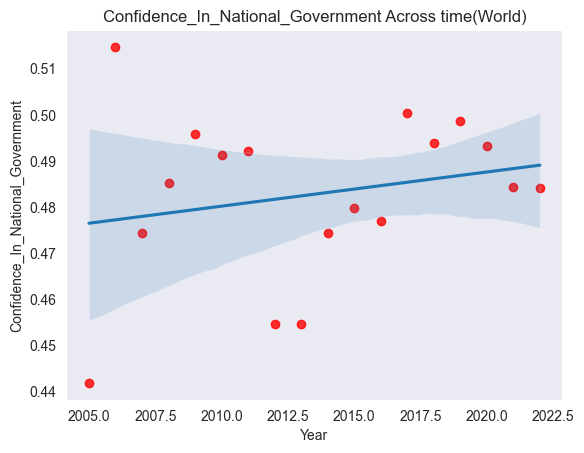

In [49]:
fig = sns.regplot(data = Confidence_in_governemnr_year, x = 'Year', y = 'Confidence_In_National_Government',scatter_kws={"color": "red"}).set(title='Confidence_In_National_Government Across time(World)')
# Confidence_In_National_Government has slightly increased across time


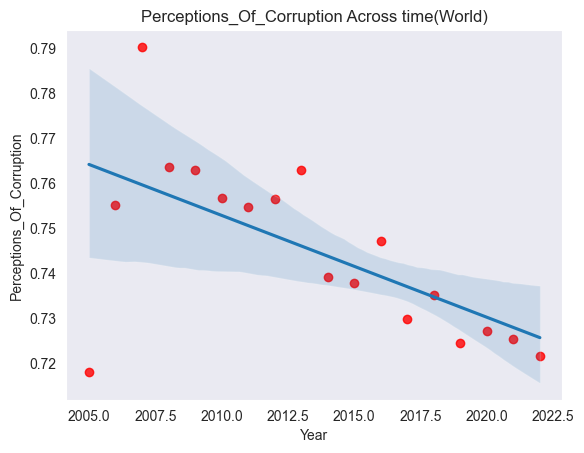

In [50]:
fig = sns.regplot(data = Confidence_in_governemnr_year, x = 'Year', y = 'Perceptions_Of_Corruption',scatter_kws={"color": "red"}).set(title='Perceptions_Of_Corruption Across time(World)')
#perception of corruption has generaally dropped across time

### B: Life ladder 

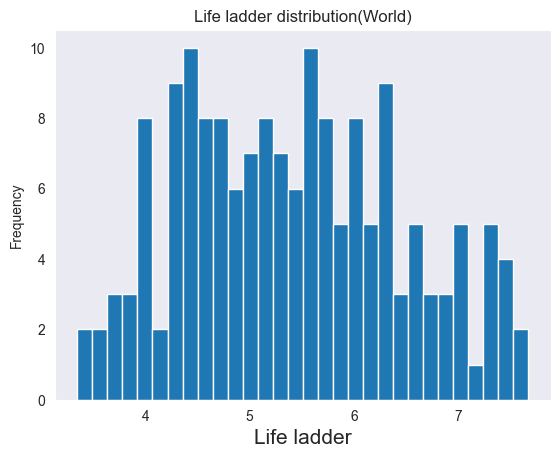

In [51]:
ax= World_happiness_avg.Life_Ladder.plot(kind="hist", bins=30, title= "Life ladder distribution(World)");
ax.set_xlabel("Life ladder",fontdict={"size": 15});

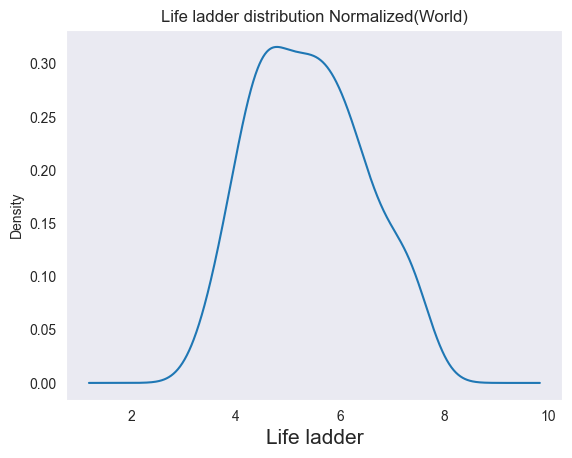

In [52]:
ax= World_happiness_avg.Life_Ladder.plot(kind="kde", title= "Life ladder distribution Normalized(World)");
ax.set_xlabel("Life ladder",fontdict={"size": 15});

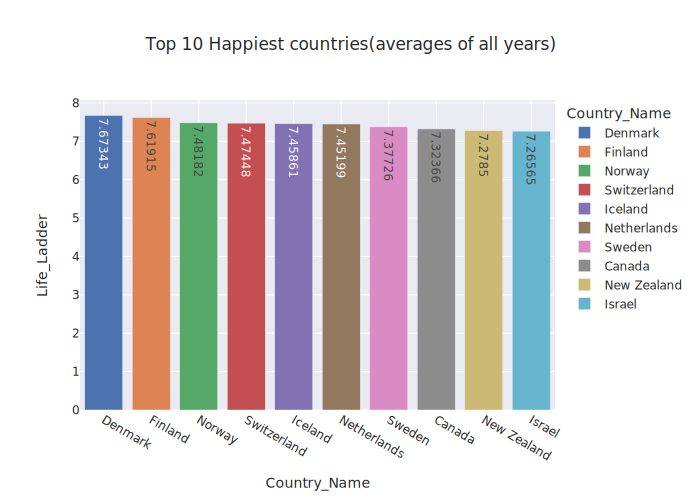

In [53]:
df_Happy=pd.DataFrame(World_happiness.set_index("Country_Name").groupby("Country_Name")["Life_Ladder"].agg("mean").round(5).sort_values(ascending=False).head(10))
fig = px.bar(df_Happy, x = df_Happy.index, y = 'Life_Ladder',
            title = 'Top 10 Happiest countries(averages of all years)', template = 'seaborn', color= df_Happy.index ,text = 'Life_Ladder')
fig.show()

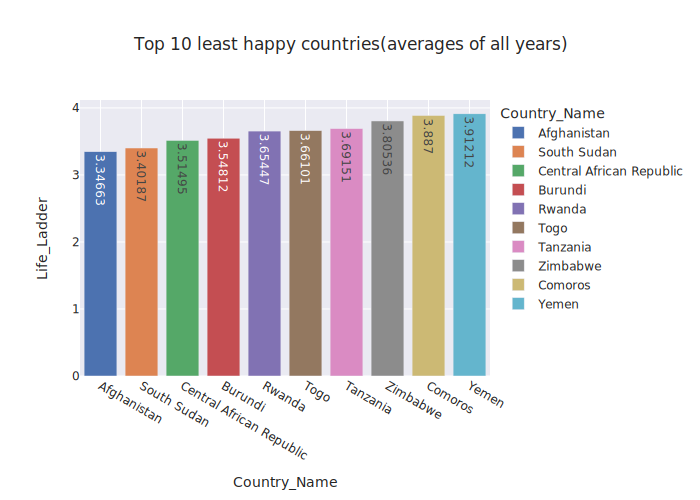

In [54]:
df_Happy=pd.DataFrame(World_happiness.set_index("Country_Name").groupby("Country_Name")["Life_Ladder"].agg("mean").round(5).sort_values(ascending=True).head(10))
fig = px.bar(df_Happy, x = df_Happy.index, y = 'Life_Ladder',
            title = 'Top 10 least happy countries(averages of all years)', template = 'seaborn', color= df_Happy.index ,text = 'Life_Ladder')
fig.show()

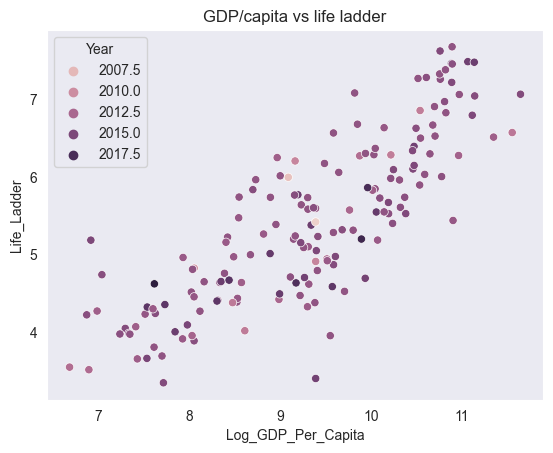

In [55]:
sns.scatterplot(x="Log_GDP_Per_Capita",y="Life_Ladder", data=World_happiness_avg, hue="Year").set(title='GDP/capita vs life ladder');
#it can clearly be seen that there is a linear relationship, meaning the richer countries are reporting better lives

### life ladder against all other features

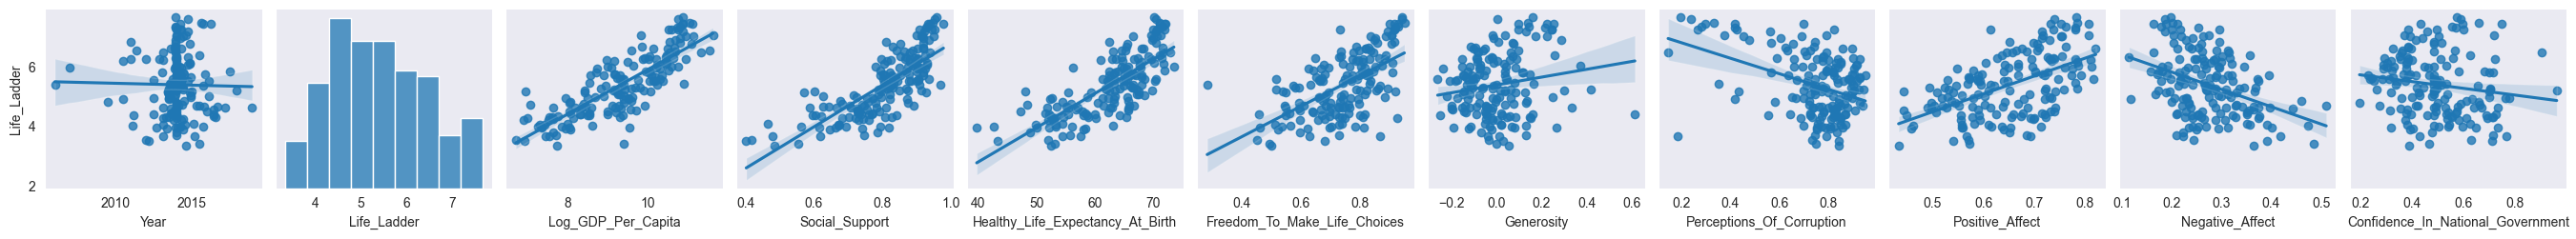

In [56]:

sns.pairplot(World_happiness_avg, y_vars="Life_Ladder", kind= 'reg');
# it can be seen that life ladder has linear relationships with (Log_GDP_Per_Capita, Social_Support, Healthy_Life_Expectancy_At_Birth, Freedom_To_Make_Life_Choices, Perceptions_Of_Corruption, Positive_Affect, Negative_Affect) 

### Choropleth across years

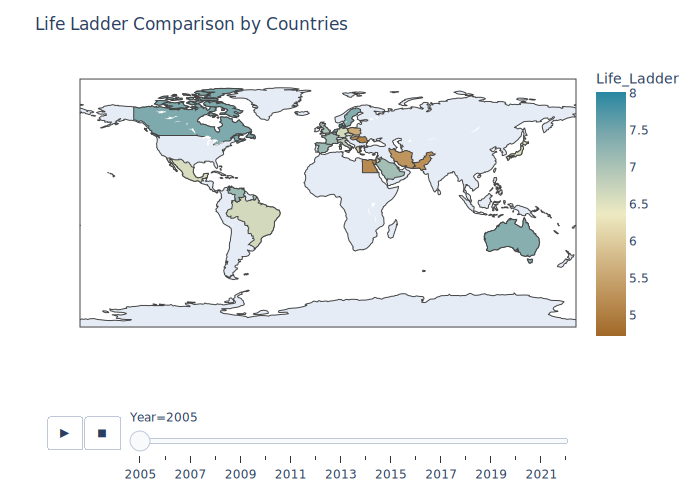

In [57]:
fig = px.choropleth(World_happiness.sort_values("Year"), 
                    locations = "Country_Name", 
                    color = "Life_Ladder",
                    locationmode = "country names",
                    template = "plotly",
                     color_continuous_scale= 'earth',
                    animation_frame = "Year")
fig.update_layout(title = "Life Ladder Comparison by Countries")
fig.show()


## B: Healthy life expectancy 

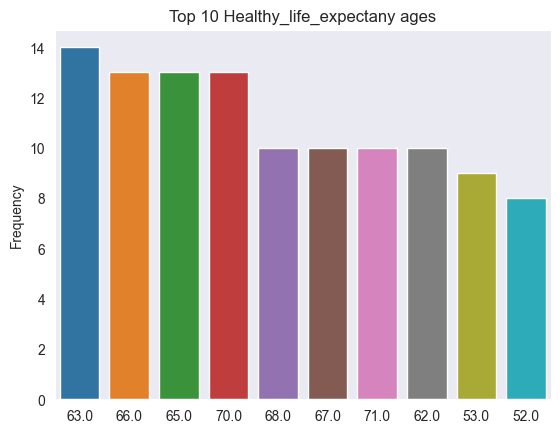

In [58]:
Healthy= pd.DataFrame(round(World_happiness_avg.Healthy_Life_Expectancy_At_Birth).value_counts().head(15).sort_values(ascending=False).head(10)).rename(columns={'Healthy_Life_Expectancy_At_Birth':'Frequency'})
sns.barplot(data=Healthy, x=Healthy.index, y="Frequency", order=Healthy.index).set(title='Top 10 Healthy_life_expectany ages');


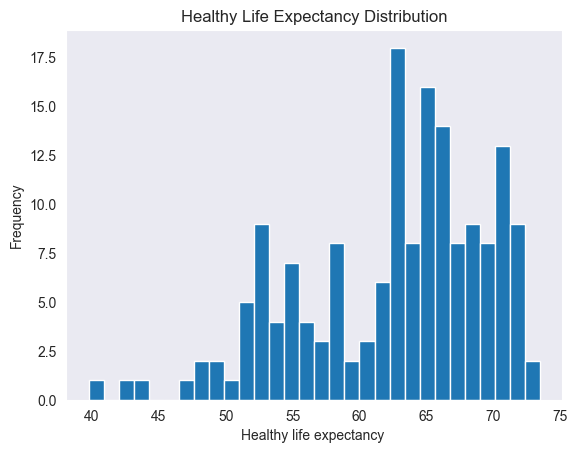

In [59]:
ax =World_happiness_avg.Healthy_Life_Expectancy_At_Birth.plot(kind='hist', bins=30, title= "Healthy Life Expectancy Distribution")
ax.set_xlabel("Healthy life expectancy ");

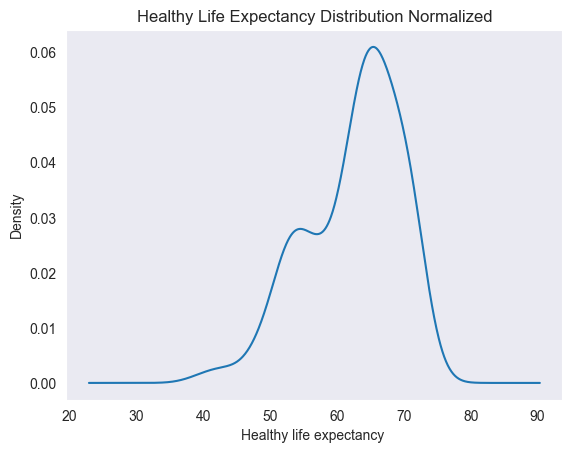

In [60]:
ax =World_happiness_avg.Healthy_Life_Expectancy_At_Birth.plot(kind='kde', title= "Healthy Life Expectancy Distribution Normalized")
ax.set_xlabel("Healthy life expectancy ");

# correlations

In [61]:
Heat_map= World_happiness_avg[['Country_Name', 'Regional_Indicator', 'Life_Ladder',
       'Log_GDP_Per_Capita', 'Social_Support',
       'Healthy_Life_Expectancy_At_Birth', 'Freedom_To_Make_Life_Choices',
       'Generosity', 'Perceptions_Of_Corruption', 'Positive_Affect',
       'Negative_Affect', 'Confidence_In_National_Government']]

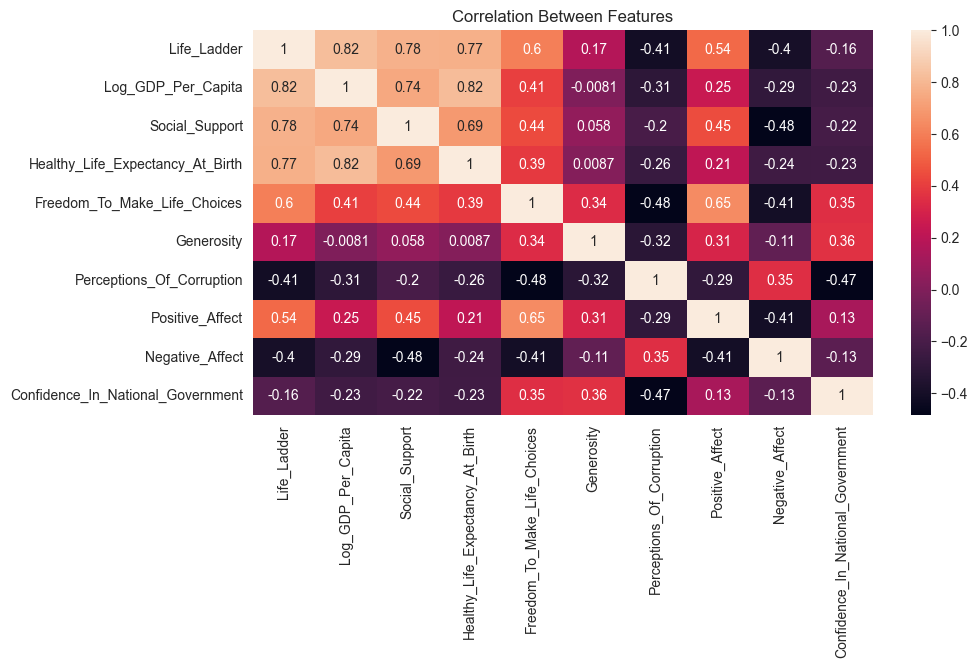

In [62]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(Heat_map.corr(numeric_only=True), annot=True);
plt.title("Correlation Between Features");